<a href="https://colab.research.google.com/github/NeuromatchAcademy/course-content-dl/blob/w3d4_updates/tutorials/W3D4_BasicReinforcementLearning/W3D4_Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1: Basic Reinforcement Learning

**Week 3, Day 4: Basic Reinforcement Learning**

**By Neuromatch Academy**

__Content creators:__ Pablo Samuel Castro

__Content reviewers:__ Shaonan Wang, Xiaomei Mi, Julia Costacurta, Dora Zhiyu Yang, Adrita Das

__Content editors:__ Shaonan Wang

__Production editors:__ Spiros Chavlis

**Our 2021 Sponsors, including Presenting Sponsor Facebook Reality Labs**

<p align='center'><img src='https://github.com/NeuromatchAcademy/widgets/blob/master/sponsors.png?raw=True'/></p>

---
# Tutorial Objectives

Reinforcement Learning (RL) is a framework for defining and solving a problem where an agent learns to take actions that maximize reward. The setting of the problem is as follows: an agent, biological or artificial, observes the current state of the world and selects an action based on that state. The agent receives a reward upon executing an action and uses this information to improve its future actions. Reinforcement learning provides formal, optimal descriptions of learning. These descriptions were first derived from studies of animal behavior and then validated when the formal quantities used in the model were observed in the brain of humans and animals.

In this tutorial, you will learn the basic concepts of RL through a simple example.

In [1]:
# @title Tutorial slides

# @markdown These are the slides for the material covered in this tutorial.
from IPython.display import IFrame
link_id = "ztgws"
print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{link_id}/?direct%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/ztgws/


---
# Setup

In [2]:
# @title Install dependencies

# @markdown **WARNING**: There may be *errors* and/or *warnings* reported during the installation. However, they are to be ignored.
!pip3 install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "public_testbed",
            "user_key": "3zg0t05r",
        },
    ).render()

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.2 MB/s eta 0:00:00


In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Tuple

---
# Section 1: A history of RL

In this section, we will briefly overview the history of reinforcement learning (RL) in reverse chronological order. This will help motivate why RL is an interesting topic to study!

In [4]:
# @title Video 1: Intro to RL
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', '4gaeCaMVHWs'),] # ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [5]:
# @title Submit your feedback
content_review("W3D4_History_of_RL")

---
# Section 2: What is RL

Using a very simple problem, we will give a high-level overview of what RL is and what are the main components that define the problem formulation.

**Extra:** If you'd like to read more, the canonical reference for RL is Sutton & Barto's [Reinforcement Learning book](http://incompleteideas.net/book/the-book-2nd.html).

## Section 2.1: Grid World

GridWorlds are very simple "navigation" problems that can be very useful for motivating RL problems and solutions. They are commonly used in RL research, so it's a good idea to get familiar with them!

We will use a simple GridWorld problem throughout this tutorial: an empty room with a reward at one corner.

An example below defines a second GridWorld that is a little more difficult. Feel free to create your own!

**Extra:** If you'd like to play with RL in GridWorlds on the web, you can check out this [GridWorld playground web app](https://gridworld-playground.glitch.me/).

In [6]:
# @title Video 2: Grid World
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'iWnCcil_vuI')]  #, ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [7]:
# @title Submit your feedback
content_review("W3D4_What_is_RL")

### Coding Exercise 1: Code a shortest-path planner for GridWorld


In [8]:
# @title Create the GridWorldPlanner object (defaults to simple example)

ASCII_TO_EMOJI = {
    ' ': '⬜',
    '*': '⬛',
    'g': '⭐',
    '<': '◀️',
    '>': '▶️',
    'v': '🔽',
    '^': '🔼',
}

ACTIONS = ['<', '>', 'v', '^']
ACTION_EFFECTS = {  # Position effects of each action.
    '<': (0, -1),
    '>': (0, 1),
    'v': (1, 0),
    '^': (-1, 0),
}


def get_emoji(c, policy=None):
  assert c in ASCII_TO_EMOJI
  if policy is not None and c != 'g':
    assert policy in ASCII_TO_EMOJI
    if policy != ' ':  # If there is a policy, use this instead.
      c = policy
  return ASCII_TO_EMOJI[c]


class GridWorldBase(object):
  """Defines a GridWorldPlanner object."""

  def __init__(self, world_spec: Optional[np.ndarray] = None):
    """Creates a GridWorld object with an empty policy.

    Args:
      world_spec: Optional array specification of GridWorld. If None, will
                  use default square room.
    """
    if world_spec is None:
      self.world_spec = np.array(
          [['*', '*', '*', '*', '*', '*'],
           ['*', ' ', ' ', ' ', ' ', '*'],
           ['*', ' ', ' ', ' ', ' ', '*'],
           ['*', ' ', ' ', ' ', ' ', '*'],
           ['*', ' ', ' ', ' ', 'g', '*'],
           ['*', '*', '*', '*', '*', '*']]
      )
    else:
      assert len(world_spec.shape) == 2
      self.world_spec = world_spec

    assert len(np.where(self.world_spec == 'g')[0]) == 1  # Only one goal.
    self.policy = np.full_like(self.world_spec, ' ')
    # **Note**: These may be useful for your planner!
    self.goal_cell = [x[0] for x in np.where(self.world_spec == 'g')]

  def get_neighbours(self, cell: Tuple[int, int]):
    """Get the neighbours of a cell.

    **Note**: You should use this when writing your planner!

    Args:
      cell: cell position.

    Returns:
      Dict containing neighbouring cells for each of the 4 possible directions.
    """
    height, width = self.world_spec.shape
    i, j = cell
    if i < 1 or i >= height or j < 1 or j >= width:
      raise ValueError(f'Invalid cell position: {cell}')
    neighbours = {}
    for a in ACTIONS:
      delta = ACTION_EFFECTS[a]
      neighbour_pos = [i + delta[0], j + delta[1]]
      if (neighbour_pos[0] < 0 or neighbour_pos[1] < 0 or
          neighbour_pos[0] >= height or neighbour_pos[1] >= width or
          self.world_spec[neighbour_pos[0], neighbour_pos[1]] == '*'):
        # Remain in same cell
        neighbours[a] = cell
      else:
        neighbours[a] = neighbour_pos
    return neighbours

  def plan(self):
    """Constructs a random policy.

    **Note**: you will make something better further down!
    """
    for i in range(self.policy.shape[0]):
      for j in range(self.policy.shape[1]):
        if self.world_spec[i, j] == '*':  # Nothing to do for walls.
          continue
        self.policy[i, j] = ACTIONS[np.random.choice(len(ACTIONS))]

  def draw(self, include_policy: bool = False):
    """Draw the grid, and (optionally) include the policy."""
    for i in range(len(self.world_spec)):
      row_range = range(len(self.world_spec[i]))
      if include_policy:
        row_chars = [get_emoji(self.world_spec[i, j], self.policy[i, j]) for j in row_range]
      else:
        row_chars = [get_emoji(self.world_spec[i, j], None) for j in row_range]
      print(''.join(row_chars))


gwb = GridWorldBase()
print('Simple GridWorld:')
gwb.draw()
gwb.plan()
print('Random policy:')
gwb.draw(True)

Simple GridWorld:
⬛⬛⬛⬛⬛⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⭐⬛
⬛⬛⬛⬛⬛⬛
Random policy:
⬛⬛⬛⬛⬛⬛
⬛🔼◀️▶️▶️⬛
⬛◀️🔼🔼▶️⬛
⬛🔽🔽◀️◀️⬛
⬛🔼🔼◀️⭐⬛
⬛⬛⬛⬛⬛⬛


In [9]:
class GridWorldPlanner(GridWorldBase):
  """A GridWorld that finds a better policy."""

  def plan(self):
    """Define a better planner!

    This gives you a starting point by setting the proper actions in the cells
    surrounding the goal cell.

    **Assignment:** Do the rest!
    """
    super().plan()
    goal_queue = [self.goal_cell]
    goals_done = set()
    goal = goal_queue.pop(0)  # pop from front of list
    goal_neighbours = self.get_neighbours(goal)
    goals_done.add(tuple(goal))

    for a in goal_neighbours:
      nbr = tuple(goal_neighbours[a])
      if nbr == goal:
        continue
      if nbr not in goals_done:
        if a == '<':
          self.policy[nbr[0], nbr[1]] = '>'
        elif a == '>':
          self.policy[nbr[0], nbr[1]] = '<'
        elif a == '^':
          self.policy[nbr[0], nbr[1]] = 'v'
        else:
          self.policy[nbr[0], nbr[1]] = '^'
        goal_queue.append(nbr)


gwp = GridWorldPlanner()
print('Simple GridWorld:')
gwp.draw()
gwp.plan()
print('Better policy:')
gwp.draw(True)

Simple GridWorld:
⬛⬛⬛⬛⬛⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⭐⬛
⬛⬛⬛⬛⬛⬛
Better policy:
⬛⬛⬛⬛⬛⬛
⬛🔼🔽◀️▶️⬛
⬛▶️▶️▶️🔽⬛
⬛🔽◀️🔼🔽⬛
⬛🔽🔼▶️⭐⬛
⬛⬛⬛⬛⬛⬛


Make a better planner!

In [10]:
class GridWorldPlanner(GridWorldBase):
  """A GridWorld that finds a better policy."""

  def plan(self):
    """Define a better planner!

    This gives you a starting point by setting the proper actions in the cells
    surrounding the goal cell.

    **Assignment:** Do the rest!
    """
    super().plan()
    goal_queue = [self.goal_cell]
    goals_done = set()
    #################################################
    # Implement a better planer
    raise NotImplementedError("Define a better planner!`")
    #################################################
    while ...:
      goal = goal_queue.pop(0)  # pop from front of list
      goal_neighbours = self.get_neighbours(goal)
      goals_done.add(tuple(goal))
      for a in goal_neighbours:
        nbr = tuple(goal_neighbours[a])
        if nbr == goal:
          continue
        if nbr not in goals_done:
          if a == '<':
            self.policy[nbr[0], nbr[1]] = '>'
          elif a == '>':
            self.policy[nbr[0], nbr[1]] = '<'
          elif a == '^':
            self.policy[nbr[0], nbr[1]] = 'v'
          else:
            self.policy[nbr[0], nbr[1]] = '^'
          goal_queue.append(nbr)

In [11]:
# to_remove solution
class GridWorldPlanner(GridWorldBase):
  """A GridWorld that finds a better policy."""

  def plan(self):
    """Define a better planner!

    This gives you a starting point by setting the proper actions in the cells
    surrounding the goal cell.

    **Assignment:** Do the rest!
    """
    super().plan()
    goal_queue = [self.goal_cell]
    goals_done = set()
    while goal_queue:
      goal = goal_queue.pop(0)  # pop from front of list
      goal_neighbours = self.get_neighbours(goal)
      goals_done.add(tuple(goal))
      for a in goal_neighbours:
        nbr = tuple(goal_neighbours[a])
        if nbr == goal:
          continue
        if nbr not in goals_done:
          if a == '<':
            self.policy[nbr[0], nbr[1]] = '>'
          elif a == '>':
            self.policy[nbr[0], nbr[1]] = '<'
          elif a == '^':
            self.policy[nbr[0], nbr[1]] = 'v'
          else:
            self.policy[nbr[0], nbr[1]] = '^'
          goal_queue.append(nbr)

In [12]:
gwp = GridWorldPlanner()
print('Simple GridWorld:')
gwp.draw()
gwp.plan()
print('Better policy:')
gwp.draw(True)

Simple GridWorld:
⬛⬛⬛⬛⬛⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⭐⬛
⬛⬛⬛⬛⬛⬛
Better policy:
⬛⬛⬛⬛⬛⬛
⬛▶️▶️▶️🔽⬛
⬛▶️▶️▶️🔽⬛
⬛▶️▶️▶️🔽⬛
⬛▶️▶️▶️⭐⬛
⬛⬛⬛⬛⬛⬛


In [13]:
# @title Try it out in a harder problem.
harder_grid = np.array(
    [['*', '*', '*', '*', '*', '*', '*', '*', '*'],
     ['*', ' ', ' ', ' ', '*', ' ', ' ', 'g', '*'],
     ['*', ' ', ' ', ' ', '*', ' ', ' ', ' ', '*'],
     ['*', ' ', ' ', ' ', '*', ' ', ' ', ' ', '*'],
     ['*', ' ', ' ', ' ', '*', ' ', ' ', ' ', '*'],
     ['*', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '*'],
     ['*', '*', '*', '*', '*', '*', '*', '*', '*'],
    ]
)
gwb_2 = GridWorldBase(harder_grid)
gwp_2 = GridWorldPlanner(harder_grid)
print('Harder GridWorld:')
gwb_2.draw()
gwb_2.plan()
print('Random policy:')
gwb_2.draw(True)
print('Better policy:')
gwp_2.plan()
gwp_2.draw(True)

Harder GridWorld:
⬛⬛⬛⬛⬛⬛⬛⬛⬛
⬛⬜⬜⬜⬛⬜⬜⭐⬛
⬛⬜⬜⬜⬛⬜⬜⬜⬛
⬛⬜⬜⬜⬛⬜⬜⬜⬛
⬛⬜⬜⬜⬛⬜⬜⬜⬛
⬛⬜⬜⬜⬜⬜⬜⬜⬛
⬛⬛⬛⬛⬛⬛⬛⬛⬛
Random policy:
⬛⬛⬛⬛⬛⬛⬛⬛⬛
⬛🔼🔽▶️⬛🔼🔼⭐⬛
⬛🔼◀️◀️⬛🔽🔼◀️⬛
⬛🔼🔽◀️⬛◀️🔼🔼⬛
⬛◀️▶️▶️⬛◀️🔽▶️⬛
⬛◀️▶️◀️◀️🔼🔼◀️⬛
⬛⬛⬛⬛⬛⬛⬛⬛⬛
Better policy:
⬛⬛⬛⬛⬛⬛⬛⬛⬛
⬛▶️▶️🔽⬛▶️▶️⭐⬛
⬛▶️▶️🔽⬛▶️▶️🔼⬛
⬛▶️▶️🔽⬛▶️▶️🔼⬛
⬛▶️▶️🔽⬛▶️▶️🔼⬛
⬛▶️▶️▶️▶️▶️▶️🔼⬛
⬛⬛⬛⬛⬛⬛⬛⬛⬛


## Section 2.2: Markov Decision Process (MDP)

Formulating RL problems traditionally happens via a Markov decision process (MDP). In this section, we will introduce all the necessary notation and write code to define the MDP corresponding to our simple GridWorld.

**Extra:** Martin Puterman's [book on Markov Decision Processes](https://onlinelibrary.wiley.com/doi/book/10.1002/9780470316887) is an excellent reference if you'd like to read more.

In [14]:
# @title Video 3: Markov Decision Process
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'lCIpzjNC4hg'),]  # ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

### Formal definitions

### Coding exercise 2: Create an MDP from the GridWorld specification

Create $P$ and $R$ matrices for MDP.

In [15]:
class MDPBase(object):
  """This object creates a proper MDP from a GridWorld object."""

  def __init__(self, grid_world: GridWorldBase):
    """Constructs an MDP from a GridWorldBase object.

    Args:
      grid_world: GridWorld specification.
    """
    # Determine how many valid states there are and create empty matrices.
    self.grid_world = grid_world
    self.num_states = np.sum(grid_world.world_spec != '*')
    self.num_actions = len(ACTIONS)
    self.P = np.zeros((self.num_states, self.num_actions, self.num_states))
    self.R = np.zeros((self.num_states, self.num_actions))
    self.pi = np.zeros(self.num_states, dtype=np.int32)
    # Create mapping from cell positions to state ID.
    state_idx = 0
    self.cell_to_state = np.ones(grid_world.world_spec.shape, dtype=np.int32) * -1  # Defaults to -1.
    self.state_to_cell = {}
    for i, row in enumerate(grid_world.world_spec):
      for j, cell in enumerate(row):
        if cell == '*':
          continue
        if cell == 'g':
          self.goal_state = state_idx
        self.cell_to_state[i, j] = state_idx
        self.state_to_cell[state_idx] = (i, j)
        state_idx += 1
    #################################################
    # States should be numbered from left-to-right and from top-to-bottom.
    raise NotImplementedError("Calculate P and R")
    #################################################
    # Assign transition probabilities and rewards accordingly.
    for s in range(...):
      neighbours = ...
      for a, action in enumerate(neighbours):
        nbr = ...
        s2 = self.cell_to_state[..., ...]
        self.P[s, a, s2] = 1.0  # Deterministic transitions
        if s2 == self.goal_state:
          self.R[s, a] = 1.0

  def draw(self, include_policy: bool = False):
    # First make sure we convert our MDP policy into the GridWorld policy.
    for s in range(self.num_states):
      r, c = self.state_to_cell[s]
      self.grid_world.policy[r, c] = ACTIONS[self.pi[s]]
    self.grid_world.draw(include_policy)

  def plan(self):
    """Define a planner
    """
    goal_queue = [self.goal_state]
    goals_done = set()
    #################################################
    # Set the proper actions
    raise NotImplementedError("Implement `plan` function!")
    #################################################
    while goal_queue:
      goal = goal_queue.pop(0)  # pop from front of list
      nbr_states, nbr_actions = ...
      goals_done.add(goal)
      for s, a in zip(..., ...):
        if s == goal:
          continue
        if s not in goals_done:
          self.pi[s] = ...
          goal_queue.append(s)

In [16]:
# to_remove solution
class MDPBase(object):
  """This object creates a proper MDP from a GridWorld object."""

  def __init__(self, grid_world: GridWorldBase):
    """Constructs an MDP from a GridWorldBase object.

    Args:
      grid_world: GridWorld specification.
    """
    # Determine how many valid states there are and create empty matrices.
    self.grid_world = grid_world
    self.num_states = np.sum(grid_world.world_spec != '*')
    self.num_actions = len(ACTIONS)
    self.P = np.zeros((self.num_states, self.num_actions, self.num_states))
    self.R = np.zeros((self.num_states, self.num_actions))
    self.pi = np.zeros(self.num_states, dtype=np.int32)
    # Create mapping from cell positions to state ID.
    state_idx = 0
    self.cell_to_state = np.ones(grid_world.world_spec.shape, dtype=np.int32) * -1  # Defaults to -1.
    self.state_to_cell = {}
    for i, row in enumerate(grid_world.world_spec):
      for j, cell in enumerate(row):
        if cell == '*':
          continue
        if cell == 'g':
          self.goal_state = state_idx
        self.cell_to_state[i, j] = state_idx
        self.state_to_cell[state_idx] = (i, j)
        state_idx += 1
    # Assign transition probabilities and rewards accordingly.
    for s in range(self.num_states):
      neighbours = grid_world.get_neighbours(self.state_to_cell[s])
      for a, action in enumerate(neighbours):
        nbr = neighbours[action]
        s2 = self.cell_to_state[nbr[0], nbr[1]]
        self.P[s, a, s2] = 1.0  # Deterministic transitions
        if s2 == self.goal_state:
          self.R[s, a] = 1.0

  def draw(self, include_policy: bool = False):
    # First make sure we convert our MDP policy into the GridWorld policy.
    for s in range(self.num_states):
      r, c = self.state_to_cell[s]
      self.grid_world.policy[r, c] = ACTIONS[self.pi[s]]
    self.grid_world.draw(include_policy)

  def plan(self):
    """Define a planner
    """
    goal_queue = [self.goal_state]
    goals_done = set()
    while goal_queue:
      goal = goal_queue.pop(0)  # pop from front of list
      nbr_states, nbr_actions = np.where(self.P[:, :, goal] > 0.)
      goals_done.add(goal)
      for s, a in zip(nbr_states, nbr_actions):
        if s == goal:
          continue
        if s not in goals_done:
          self.pi[s] = a
          goal_queue.append(s)

In [17]:
mdpb = MDPBase(gwb)

# Verify the transitions were properly created.
for i, row in enumerate(mdpb.grid_world.world_spec):
  for j, cell in enumerate(row):
    if cell == '*':
      continue
    neighbours = mdpb.grid_world.get_neighbours((i, j))
    s = mdpb.cell_to_state[i, j]
    for a, action in enumerate(neighbours):
      nbr = neighbours[action]
      s2 = mdpb.cell_to_state[nbr[0], nbr[1]]
      assert np.sum(mdpb.P[s, a, :]) == 1.0
      assert mdpb.P[s, a, s2] == 1.0
      if s2 == mdpb.goal_state:
        assert mdpb.R[s, a] == 1.0
      else:
        assert mdpb.R[s, a] == 0.0

print('P and R matrices successfully created!')
print('GridWorld:')
mdpb.draw()
print('Shortest path policy:')
mdpb.plan()
mdpb.draw(True)

P and R matrices successfully created!
GridWorld:
⬛⬛⬛⬛⬛⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⭐⬛
⬛⬛⬛⬛⬛⬛
Shortest path policy:
⬛⬛⬛⬛⬛⬛
⬛🔽🔽🔽🔽⬛
⬛🔽🔽🔽🔽⬛
⬛🔽🔽🔽🔽⬛
⬛▶️▶️▶️⭐⬛
⬛⬛⬛⬛⬛⬛


In [18]:
# @title Submit your feedback
content_review("W3D4_Create_MDP")

## Section 2.3: $Q$-values

$Q$-values are central to RL algorithms, as they quantify the *desirability* of performing an action given a particular state. The agent updates these values throughout training and can use its estimates to decide how to act.

In [19]:
# @title Video 4: Q-values
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'uRKjEic6uxg'),]  # ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [20]:
# @title Submit your feedback
content_review("W3D4_MDP")

### Coding exercise 3: Create a steps-to-go solver

Create a new MDP class that holds steps-to-go as Q-values

In [21]:
class MDPToGo(MDPBase):

  def __init__(self, grid_world: GridWorldBase):
    """Constructs an MDP from a GridWorldBase object.

    States should be numbered from left-to-right and from top-to-bottom.

    Args:
      grid_world: GridWorld specification.
    """
    super().__init__(grid_world)
    self.Q = np.zeros((self.num_states, self.num_actions))

  def computeQ(self):
    """Store discounted steps-to-go in an SxA matrix called Q.

    This matrix will then be used to extract the optimal policy.
    """
    #################################################
    # Implement a function to compute Q
    raise NotImplementedError("Implement `ComputeQ` function!")
    #################################################
    goal_queue = [(self.goal_state, 0)]
    goals_done = set()
    while goal_queue:
      goal, steps_to_go = ...  # pop from front of list
      steps_to_go += ...  # Increase the number of steps to goal.
      nbr_states, nbr_actions = ...
      goals_done.add(...)
      for s, a in zip(..., ...):
        if goal == self.goal_state and s == self.goal_state:
          self.Q[s, a] = ...
        elif s == goal:
          # If (s, a) leads to itself then we have an infinite loop (since
          # we're assuming deterministic transitions).
          self.Q[s, a] = ...
        else:
          self.Q[s, a] = ...
        if s not in goals_done:
          goal_queue.append((..., ...))

  def plan(self):
    """Now planning is just doing an argmin over the Q-values!

    Note that this is a little different than standard Q-learning (where we do
    an argmax), since our Q-values currently store steps-to-go.
    """
    self.pi = np.argmin(self.Q, axis=-1)

In [22]:
# to_remove solution
class MDPToGo(MDPBase):

  def __init__(self, grid_world: GridWorldBase):
    """Constructs an MDP from a GridWorldBase object.

    States should be numbered from left-to-right and from top-to-bottom.

    Args:
      grid_world: GridWorld specification.
    """
    super().__init__(grid_world)
    self.Q = np.zeros((self.num_states, self.num_actions))

  def computeQ(self):
    """Store steps-to-go in an SxA matrix called Q.

    This matrix will then be used to extract the optimal policy.

    ** Assignment:** Write this function!
    """
    goal_queue = [(self.goal_state, 0)]
    goals_done = set()
    while goal_queue:
      goal, steps_to_go = goal_queue.pop(0)  # pop from front of list
      steps_to_go += 1  # Increase the number of steps to goal.
      nbr_states, nbr_actions = np.where(self.P[:, :, goal] > 0.)
      goals_done.add(goal)
      for s, a in zip(nbr_states, nbr_actions):
        if goal == self.goal_state and s == self.goal_state:
          self.Q[s, a] = 0
        elif s == goal:
          # If (s, a) leads to itself then we have an infinite loop (since
          # we're assuming deterministic transitions).
          self.Q[s, a] = np.inf
        else:
          self.Q[s, a] = steps_to_go
        if s not in goals_done:
          goal_queue.append((s, steps_to_go))

  def plan(self):
    """Now planning is just doing an argmin over the Q-values!

    Note that this is a little different than standard Q-learning (where we do
    an argmax), since our Q-values currently store steps-to-go.
    """
    self.pi = np.argmin(self.Q, axis=-1)

In [23]:
mdpTg = MDPToGo(gwb)
print('GridWorld:')
mdpTg.draw()
# Compute Q, then extract policy from it.
mdpTg.computeQ()
mdpTg.plan()
print('Optimal policy:')
mdpTg.draw(True)

GridWorld:
⬛⬛⬛⬛⬛⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⭐⬛
⬛⬛⬛⬛⬛⬛
Optimal policy:
⬛⬛⬛⬛⬛⬛
⬛▶️▶️▶️🔽⬛
⬛▶️▶️▶️🔽⬛
⬛▶️▶️▶️🔽⬛
⬛▶️▶️▶️⭐⬛
⬛⬛⬛⬛⬛⬛


In [24]:
# @title Submit your feedback
content_review("W3D4_MDP_Q_values")

---
# Section 3: Value iteration

Value iteration is an iterative algorithm that continuously improves estimates of $Q$ and $V$ by performing the *Bellman backup*. This assumes access to $P$ and $R$ (not typically accessible in RL) but is the backbone of $Q$-learning, which we will discuss later.

<br>

> *Did you know?* Richard Bellman developed dynamic programming (a core part of any computer science curriculum) precisely for value iteration.

In [25]:
# @title Video 5: Value iteration
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'apqKT3MaMfs'),]  # ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [26]:
# @title Submit your feedback
content_review("W3D4_Video_4")

### Coding exercise 4: Implement value iteration

Create a new MDP class that does value iteration

In [27]:
class MDPValueIteration(MDPToGo):

  def __init__(self, grid_world: GridWorldBase, gamma: float = 0.99):
    """Constructs an MDP from a GridWorldBase object.

    States should be numbered from left-to-right and from top-to-bottom.

    Args:
      grid_world: GridWorld specification.
      gamma: Discount factor.
    """
    super().__init__(grid_world)
    self.gamma = gamma

  def computeQ(self, error_tolerance : float = 1e-5):
    """Compute Q and V vectors via value iteration.

    Args:
      error_tolerance: How much error we tolerate between successive Q updates.
    """
    self.Q = np.zeros((self.num_states, self.num_actions))
    num_iterations = 0
    error = np.inf
    #################################################
    # Write this method!
    # First find Q, and then extract V from Q.
    # Hint: Use matrix multiplication instead of for loops!
    raise NotImplementedError("Implement `computeQ` function!")
    #################################################
    while error > error_tolerance:
      new_Q = ...
      max_next_Q = ...
      for a in range(self.num_actions):
        new_Q[:, a] = ...
      error = ...
      self.Q = np.copy(new_Q)
      num_iterations += 1
    self.V = np.max(self.Q, axis=-1)
    print(f'Q and V found in {num_iterations} iterations with an error tolerance of {error_tolerance}.')

  def plan(self):
    """Now planning is just doing an argmax over the Q-values!
    """
    #################################################
    # Note that we're going back to argmax, since the Q-values now represent proper
    # "returns-to-go", so we want to maximize that.
    # Write this method! It should be a one-liner, and very similar to what you
    # used for extracting V from Q.
    raise NotImplementedError("Implement `plan` function!")
    #################################################
    self.pi = ...

  def _draw_v(self):
    """Draw the V values."""
    min_v = np.min(self.V)
    max_v = np.max(self.V)
    wall_v = 2 * min_v - max_v  # Creating a smaller value for walls.
    grid_values = np.ones_like(self.grid_world.world_spec, dtype=np.int32) * wall_v
    # Fill in the V values in grid cells.
    for s in range(self.num_states):
      cell = self.state_to_cell[s]
      grid_values[cell[0], cell[1]] = self.V[s]

    fig, ax = plt.subplots()
    ax.grid(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    grid = ax.matshow(grid_values)
    grid.set_clim(wall_v, max_v)
    fig.colorbar(grid)

  def draw(self, draw_mode: str = 'grid'):
    """Draw the GridWorld according to specified mode.

    Args:
      draw_mode: Specification of what mode to draw. Supported options:
                 'grid': Draw the base GridWorld.
                 'policy': Display the policy.
                 'values': Display the values for each state.
    """
    # First make sure we convert our MDP policy into the GridWorld policy.
    if draw_mode == 'values':
      self._draw_v()
    else:
      super().draw(draw_mode == 'policy')

In [28]:
# to_remove solution
class MDPValueIteration(MDPToGo):

  def __init__(self, grid_world: GridWorldBase, gamma: float = 0.99):
    """Constructs an MDP from a GridWorldBase object.

    States should be numbered from left-to-right and from top-to-bottom.

    Args:
      grid_world: GridWorld specification.
      gamma: Discount factor.
    """
    super().__init__(grid_world)
    self.gamma = gamma

  def computeQ(self, error_tolerance : float = 1e-5):
    """Compute Q and V vectors via value iteration.

    Args:
      error_tolerance: How much error we tolerate between successive Q updates.
    """
    self.Q = np.zeros((self.num_states, self.num_actions))
    num_iterations = 0
    error = np.inf
    while error > error_tolerance:
      new_Q = np.zeros_like(self.Q)
      max_next_Q = np.max(self.Q, axis=-1)
      for a in range(self.num_actions):
        new_Q[:, a] = self.R[:, a] + self.gamma * (self.P[:, a, :] @ max_next_Q)
      error = np.max(abs(new_Q - self.Q))
      self.Q = np.copy(new_Q)
      num_iterations += 1
    self.V = np.max(self.Q, axis=-1)
    print(f'Q and V found in {num_iterations} iterations with an error tolerance of {error_tolerance}.')

  def plan(self):
    """Now planning is just doing an argmax over the Q-values!
    """
    self.pi = np.argmax(self.Q, axis=-1)

  def _draw_v(self):
    """Draw the V values."""
    min_v = np.min(self.V)
    max_v = np.max(self.V)
    wall_v = 2 * min_v - max_v  # Creating a smaller value for walls.
    grid_values = np.ones_like(self.grid_world.world_spec, dtype=np.int32) * wall_v
    # Fill in the V values in grid cells.
    for s in range(self.num_states):
      cell = self.state_to_cell[s]
      grid_values[cell[0], cell[1]] = self.V[s]

    fig, ax = plt.subplots()
    ax.grid(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    grid = ax.matshow(grid_values)
    grid.set_clim(wall_v, max_v)
    fig.colorbar(grid)

  def draw(self, draw_mode: str = 'grid'):
    """Draw the GridWorld according to specified mode.

    Args:
      draw_mode: Specification of what mode to draw. Supported options:
                 'grid': Draw the base GridWorld.
                 'policy': Display the policy.
                 'values': Display the values for each state.
    """
    # First make sure we convert our MDP policy into the GridWorld policy.
    if draw_mode == 'values':
      self._draw_v()
    else:
      super().draw(draw_mode == 'policy')

GridWorld:
⬛⬛⬛⬛⬛⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⭐⬛
⬛⬛⬛⬛⬛⬛
Q and V found in 1147 iterations with an error tolerance of 1e-05.
Optimal policy:
⬛⬛⬛⬛⬛⬛
⬛▶️▶️▶️🔽⬛
⬛▶️▶️▶️🔽⬛
⬛▶️▶️▶️🔽⬛
⬛▶️▶️▶️⭐⬛
⬛⬛⬛⬛⬛⬛


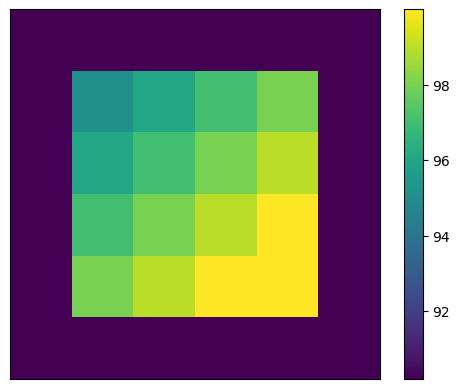

In [29]:
mdpVi = MDPValueIteration(gwb)
print('GridWorld:')
mdpVi.draw()
# Compute Q, then extract policy from it.
mdpVi.computeQ()
mdpVi.plan()
print('Optimal policy:')
mdpVi.draw('policy')
mdpVi.draw('values')

In [30]:
# @title Submit your feedback
content_review("W3D4_MDPValueIteration")

---
# Section 4: Policy iteration

Rather than iterating on estimates of $Q$ and $V$ until we've reached some form of convergence, why not iterate directly on the policy $\pi$ instead?

Policy iteration does just that and can sometimes lead to solutions in fewer steps than value iteration.

In [31]:
# @title Video 6: Policy iteration
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', '5bw3qtbR_NQ')] #('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [32]:
# @title Submit your feedback
content_review("W3D4_Video_5")

### Coding exercise 5: Implement policy iteration

Create a new MDP class that does policy iteration.

In [33]:
class MDPPolicyIteration(MDPToGo):

  def __init__(self, grid_world: GridWorldBase, gamma: float = 0.99):
    """Constructs an MDP from a GridWorldBase object.

    States should be numbered from left-to-right and from top-to-bottom.

    Args:
      grid_world: GridWorld specification.
      gamma: Discount factor.
    """
    super().__init__(grid_world)
    self.gamma = gamma

  def findPi(self):
    """Find π policy.
    """
    self.Q = np.zeros((self.num_states, self.num_actions))
    self.pi = np.zeros(self.num_states, dtype=np.int32)
    num_iterations = 0
    #################################################
    # Compute π, which involves computing Q.
    # Once you have π and Q, find V.
    # Hint: Your value iteration solution will be useful here.
    raise NotImplementedError("Implement `findPi` function!")
    #################################################
    new_pi = ...  # initialize to ones
    while np.any(new_pi != self.pi):
      new_pi = ...
      new_Q = ...  # initialize to zeros
      next_V = ...
      for a in range(self.num_actions):
        new_Q[:, a] = ...
      self.Q = np.copy(new_Q)
      self.pi = ...
      num_iterations += 1
    self.V = ...
    print(f'Q and V found in {num_iterations} iterations.')

  def _draw_v(self):
    """Draw the V values."""
    min_v = np.min(self.V)
    max_v = np.max(self.V)
    wall_v = 2 * min_v - max_v  # Creating a smaller value for walls.
    grid_values = np.ones_like(self.grid_world.world_spec, dtype=np.int32) * wall_v
    # Fill in the V values in grid cells.
    for s in range(self.num_states):
      cell = self.state_to_cell[s]
      grid_values[cell[0], cell[1]] = self.V[s]

    fig, ax = plt.subplots()
    ax.grid(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    grid = ax.matshow(grid_values)
    grid.set_clim(wall_v, max_v)
    fig.colorbar(grid)

  def draw(self, draw_mode: str = 'grid'):
    """Draw the GridWorld according to specified mode.

    Args:
      draw_mode: Specification of what mode to draw. Supported options:
                 'grid': Draw the base GridWorld.
                 'policy': Display the policy.
                 'values': Display the values for each state.
    """
    # First make sure we convert our MDP policy into the GridWorld policy.
    if draw_mode == 'values':
      self._draw_v()
    else:
      super().draw(draw_mode == 'policy')

In [34]:
# to_remove solution
class MDPPolicyIteration(MDPToGo):

  def __init__(self, grid_world: GridWorldBase, gamma: float = 0.99):
    """Constructs an MDP from a GridWorldBase object.

    States should be numbered from left-to-right and from top-to-bottom.

    Args:
      grid_world: GridWorld specification.
      gamma: Discount factor.
    """
    super().__init__(grid_world)
    self.gamma = gamma

  def findPi(self):
    """Find π policy.
    """
    self.Q = np.zeros((self.num_states, self.num_actions))
    self.pi = np.zeros(self.num_states, dtype=np.int32)
    num_iterations = 0
    new_pi = np.ones_like(self.pi)
    while np.any(new_pi != self.pi):
      new_pi = self.pi  # initialize to ones
      new_Q = np.zeros_like(self.Q)  # initialize to zeros
      next_V = np.array([mdpVi.Q[i, x] for i, x in enumerate(mdpVi.pi)])
      for a in range(self.num_actions):
        new_Q[:, a] = self.R[:, a] + self.gamma * np.matmul(self.P[:, a, :], next_V)
      self.Q = np.copy(new_Q)
      self.pi = np.argmax(self.Q, axis=-1)
      num_iterations += 1
    self.V = np.max(self.Q, axis=-1)
    print(f'Q and V found in {num_iterations} iterations.')

  def _draw_v(self):
    """Draw the V values."""
    min_v = np.min(self.V)
    max_v = np.max(self.V)
    wall_v = 2 * min_v - max_v  # Creating a smaller value for walls.
    grid_values = np.ones_like(self.grid_world.world_spec, dtype=np.int32) * wall_v
    # Fill in the V values in grid cells.
    for s in range(self.num_states):
      cell = self.state_to_cell[s]
      grid_values[cell[0], cell[1]] = self.V[s]

    fig, ax = plt.subplots()
    ax.grid(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    grid = ax.matshow(grid_values)
    grid.set_clim(wall_v, max_v)
    fig.colorbar(grid)

  def draw(self, draw_mode: str = 'grid'):
    """Draw the GridWorld according to specified mode.

    Args:
      draw_mode: Specification of what mode to draw. Supported options:
                 'grid': Draw the base GridWorld.
                 'policy': Display the policy.
                 'values': Display the values for each state.
    """
    # First make sure we convert our MDP policy into the GridWorld policy.
    if draw_mode == 'values':
      self._draw_v()
    else:
      super().draw(draw_mode == 'policy')

GridWorld:
⬛⬛⬛⬛⬛⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⭐⬛
⬛⬛⬛⬛⬛⬛
Q and V found in 2 iterations.
Optimal policy:
⬛⬛⬛⬛⬛⬛
⬛▶️▶️▶️🔽⬛
⬛▶️▶️▶️🔽⬛
⬛▶️▶️▶️🔽⬛
⬛▶️▶️▶️⭐⬛
⬛⬛⬛⬛⬛⬛


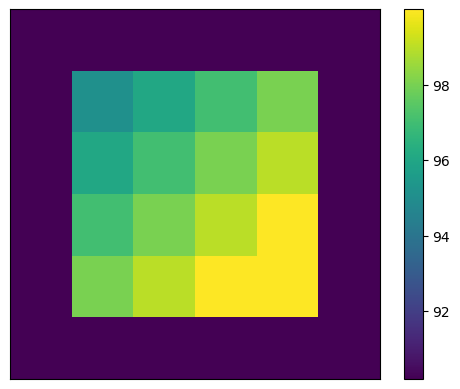

In [35]:
mdpPi = MDPPolicyIteration(gwb)
print('GridWorld:')
mdpPi.draw()
# Compute Q, then extract policy from it.
mdpPi.findPi()
print('Optimal policy:')
mdpPi.draw('policy')
mdpPi.draw('values')

In [36]:
# @title Submit your feedback
content_review("W3D4_MDPPolicyIteration")

---
# Section 5: $Q$-learning algorithm

RL assumes we don't have access to $P$ nor $R$, so we can use neither value nor policy iteration to find an optimal behavior for our agent.

$Q$-learning, however, incorporates the Bellman backup into an online learning algorithm: $Q$-learning, which can be shown to converge to the true $Q$-values (under mild conditions)!

In [37]:
# @title Video 7: Q-learning
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'NWcyKRhHq2Q'),]  # ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [38]:
# @title Submit your feedback
content_review("W3D4_MDPPolicyIteration")

### Coding exercise 6: Implement Q-learning

Create a Q-learning class

In [39]:
class QLearner(MDPValueIteration):

  def __init__(self, grid_world: GridWorldBase, gamma: float = 0.99):
    """Constructs an MDP from a GridWorldBase object.

    States should be numbered from left-to-right and from top-to-bottom.

    Args:
      grid_world: GridWorld specification.
      gamma: Discount factor.
    """
    super().__init__(grid_world, gamma)
    self.Q = np.zeros((self.num_states, self.num_actions))
    # Pick an initial state randomly.
    self.current_state = np.random.choice(self.num_states)

  def step(self, action: int) -> Tuple[int, float]:
    """Take a step in MDP from self.current_state.

    Args:
      action: Action to take.

    Returns:
      Next state and reward received.
    """
    new_state = np.random.choice(self.num_states,
                                 p=self.P[self.current_state, action, :])
    return (new_state, self.R[self.current_state, action])

  def pickAction(self) -> int:
    """Pick the best action from the current state and Q-value estimates."""
    return np.argmax(self.Q[self.current_state, :])

  def maybeReset(self):
    """If current_state is goal, reset to a random state."""
    if self.current_state == self.goal_state:
      self.current_state = np.random.choice(self.num_states)

  def learnQ(self, alpha: float = 0.1, max_steps: int = 10_000):
    """Learn the Q-function by interacting with the environment.

    Args:
      alpha: Learning rate.
      max_steps: Maximum number of steps to take.
    """
    self.Q = np.zeros((self.num_states, self.num_actions))
    num_steps = 0
    #################################################
    # Hint: Use the step(), pickAction(), and maybeReset() functions above.
    # Note: The way you initialize the Q-values is crucial here. Try first with
    # an all-zeros initialization (as is currently coded below). If it doesn't
    # work, try a different initialization.
    # Hint: The maximum possible value (given the rewards are in [0, 1]) is
    #       1 / (1 - gamma).
    raise NotImplementedError("Write `learnQ` function!")
    #################################################
    while num_steps < max_steps:
      a = ...
      new_state, r = ...
      td = ...
      self.Q[self.current_state, a] += ...
      self.current_state = ...
      self.maybeReset()
      num_steps += 1
    self.V = ...


  def plan(self):
    """Now planning is just doing an argmin over the Q-values!

    Note that this is a little different than standard Q-learning (where we do
    an argmax), since our Q-values currently store steps-to-go.
    """
    self.pi = np.argmax(self.Q, axis=-1)
    self.V = np.max(self.Q, axis=-1)

In [40]:
# to_remove solution
class QLearner(MDPValueIteration):

  def __init__(self, grid_world: GridWorldBase, gamma: float = 0.99):
    """Constructs an MDP from a GridWorldBase object.

    States should be numbered from left-to-right and from top-to-bottom.

    Args:
      grid_world: GridWorld specification.
      gamma: Discount factor.
    """
    super().__init__(grid_world, gamma)
    self.Q = np.zeros((self.num_states, self.num_actions))
    # Pick an initial state randomly.
    self.current_state = np.random.choice(self.num_states)

  def step(self, action: int) -> Tuple[int, float]:
    """Take a step in MDP from self.current_state.

    Args:
      action: Action to take.

    Returns:
      Next state and reward received.
    """
    new_state = np.random.choice(self.num_states,
                                 p=self.P[self.current_state, action, :])
    return (new_state, self.R[self.current_state, action])

  def pickAction(self) -> int:
    """Pick the best action from the current state and Q-value estimates."""
    return np.argmax(self.Q[self.current_state, :])

  def maybeReset(self):
    """If current_state is goal, reset to a random state."""
    if self.current_state == self.goal_state:
      self.current_state = np.random.choice(self.num_states)

  def learnQ(self, alpha: float = 0.1, max_steps: int = 10_000):
    """Learn the Q-function by interacting with the environment.

    ** Assignment:** Write this function!
    Hint: Use the step(), pickAction(), and maybeReset() functions above.
    **Note: The way you initialize the Q-values is crucial here. Try first with
    an all-zeros initialization (as is currently coded below). If it doesn't
    work, try a different initialization.
    Hint: The maximum possible value (given the rewards are in [0, 1]) is
          1 / (1 - gamma).

    Args:
      alpha: Learning rate.
      max_steps: Maximum number of steps to take.
    """
    # Initialize Q-values optimistically.
    self.Q = np.ones((self.num_states, self.num_actions)) / (1 - self.gamma)
    num_steps = 0
    while num_steps < max_steps:
      a = self.pickAction()
      new_state, r = self.step(a)
      td = r + self.gamma * np.max(self.Q[new_state, :]) - self.Q[self.current_state, a]
      self.Q[self.current_state, a] += alpha * td
      self.current_state = new_state
      self.maybeReset()
      num_steps += 1
    self.V = np.max(self.Q, axis=-1)

  def plan(self):
    """Now planning is just doing an argmin over the Q-values!

    Note that this is a little different than standard Q-learning (where we do
    an argmax), since our Q-values currently store steps-to-go.
    """
    self.pi = np.argmax(self.Q, axis=-1)

GridWorld:
⬛⬛⬛⬛⬛⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⭐⬛
⬛⬛⬛⬛⬛⬛
Optimal policy:
⬛⬛⬛⬛⬛⬛
⬛🔽▶️▶️🔽⬛
⬛▶️▶️🔽🔽⬛
⬛▶️▶️▶️🔽⬛
⬛▶️▶️▶️⭐⬛
⬛⬛⬛⬛⬛⬛


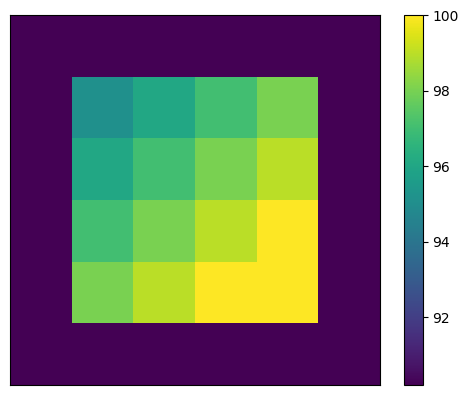

In [41]:
base_q_learner = QLearner(gwb)
print('GridWorld:')
base_q_learner.draw()
# Compute Q, then extract policy from it.
base_q_learner.learnQ()
base_q_learner.plan()
print('Optimal policy:')
base_q_learner.draw('policy')
base_q_learner.draw('values')

In [42]:
# @title Submit your feedback
content_review("W3D4_QLearner")

---
# Section 6: $\epsilon$-greedy exploitation

Should an agent *exploit* its current estimates and policy, or should it *explore* the environment in case better policies are out there? This *exploration-exploitation dilemma* is a central problem in RL.

In this section, we explore one of the simplest yet most effective methods for this tradeoff: the so-called $\epsilon$-greedy exploration.

In [43]:
# @title Video 8: Epsilon-greedy exploration
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', '2Ug3OVYdpUE'),]  # ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [44]:
# @title Submit your feedback
content_review("W3D4_Video_7")

### Coding exercise 7: Implement epsilon-greedy exploration

Create a Q-learning class with epsilon-greedy exploration

In [45]:
class QLearnerExplorer(QLearner):

  def __init__(self, grid_world: GridWorldBase, gamma: float = 0.99,
               epsilon: float = 0.1):
    """Constructs an MDP from a GridWorldBase object.

    States should be numbered from left-to-right and from top-to-bottom.

    Args:
      grid_world: GridWorld specification.
      gamma: Discount factor.
      epsilon: Exploration rate.
    """
    super().__init__(grid_world, gamma)
    self.epsilon = epsilon

  def pickAction(self):
    """Pick the next action from the current state.
    """
    #################################################
    # With probability epsilon will pick the next action randomly, otherwise will
    # pick based on the Q-value estimates.
    # Hint: It should only be a few lines of code!
    raise NotImplementedError("Write the `pickAction` function!")
    #################################################
    if ... < ...:
      return ...
    return ...

In [46]:
# to_remove solution
class QLearnerExplorer(QLearner):

  def __init__(self, grid_world: GridWorldBase, gamma: float = 0.99,
               epsilon: float = 0.1):
    """Constructs an MDP from a GridWorldBase object.

    States should be numbered from left-to-right and from top-to-bottom.

    Args:
      grid_world: GridWorld specification.
      gamma: Discount factor.
      epsilon: Exploration rate.
    """
    super().__init__(grid_world, gamma)
    self.epsilon = epsilon

  def pickAction(self):
    """Pick the next action from the current state.
    """
    if np.random.rand() < self.epsilon:
      return np.random.choice(self.num_actions)
    return np.argmax(self.Q[self.current_state, :])

GridWorld:
⬛⬛⬛⬛⬛⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⬜⬛
⬛⬜⬜⬜⭐⬛
⬛⬛⬛⬛⬛⬛
Optimal policy:
⬛⬛⬛⬛⬛⬛
⬛🔽▶️▶️🔽⬛
⬛🔽▶️🔽🔽⬛
⬛▶️▶️▶️🔽⬛
⬛▶️▶️▶️⭐⬛
⬛⬛⬛⬛⬛⬛


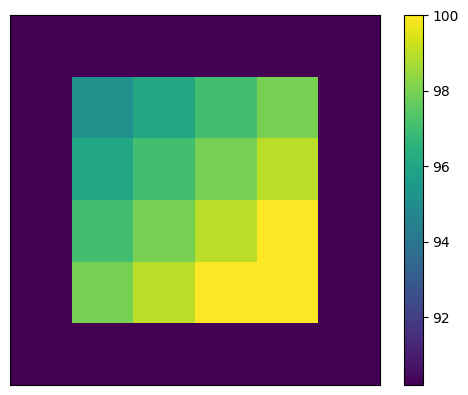

In [47]:
explorer = QLearnerExplorer(gwb)
print('GridWorld:')
explorer.draw()
# Compute Q, then extract policy from it.
explorer.learnQ()
explorer.plan()
print('Optimal policy:')
explorer.draw('policy')
explorer.draw('values')

In [48]:
# @title Submit your feedback
content_review("W3D4_QLearnerExplorer")

---
# Summary

Reinforcement learning is important in artificial intelligence because it allows an agent to learn how to make decisions in complex environments based on trial and error. Understanding how an agent learns and the various algorithms used to facilitate this learning is crucial for developing effective RL systems.

* The Gridworld environment is a commonly used testbed for RL algorithms and provides a simple yet challenging environment for agents to learn in. By mastering the Gridworld environment, researchers can apply the same principles to more complex tasks.

* $Q$-values are a fundamental concept in RL, representing the expected reward an agent will receive by taking a certain action in a given state. Computing $Q$-values is essential for many RL algorithms, including $Q$-learning.

* The value and policy iteration algorithms are important because they provide a way to compute optimal policies for an agent in a given environment. These algorithms help an agent make decisions leading to the greatest cumulative reward over time.

* $Q$-learning is a widely used RL algorithm known for its simplicity and effectiveness. It is essential because it allows an agent to learn how to make decisions in an environment without requiring a model of the environment and can be applied to a wide range of tasks.

* Finally, $\epsilon$-greedy exploration is an important concept in RL because it helps to balance the exploration-exploitation tradeoff. Occasionally choosing a random action allows an agent to explore new areas of the environment and potentially discover better policies.

